# **Trabajo Final**

## **Creación de los almacenes y puntos de entrega**

In [ ]:
import numpy as np
import numpy.random as npr
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def generarAlmacenes(cantidad):
  almacenes = npr.randint(0, 1000, (cantidad, 2), dtype=np.int)
  return almacenes

def generarPuntos(cantidad):
  puntos = npr.randint(0, 1000, (cantidad, 2), dtype=np.int)
  return puntos

almacenes = generarAlmacenes(50)
puntos = generarPuntos(2500)

In [ ]:
for i, _ in enumerate(puntos):
  while puntos[i] in almacenes:
    puntos[i] = npr.randint(0, 1000, (1, 2), dtype=np.int)


In [ ]:
np.savetxt('puntos.csv', puntos, delimiter=",", comments="")
np.savetxt('almacenes.csv', almacenes, delimiter=",", comments="")

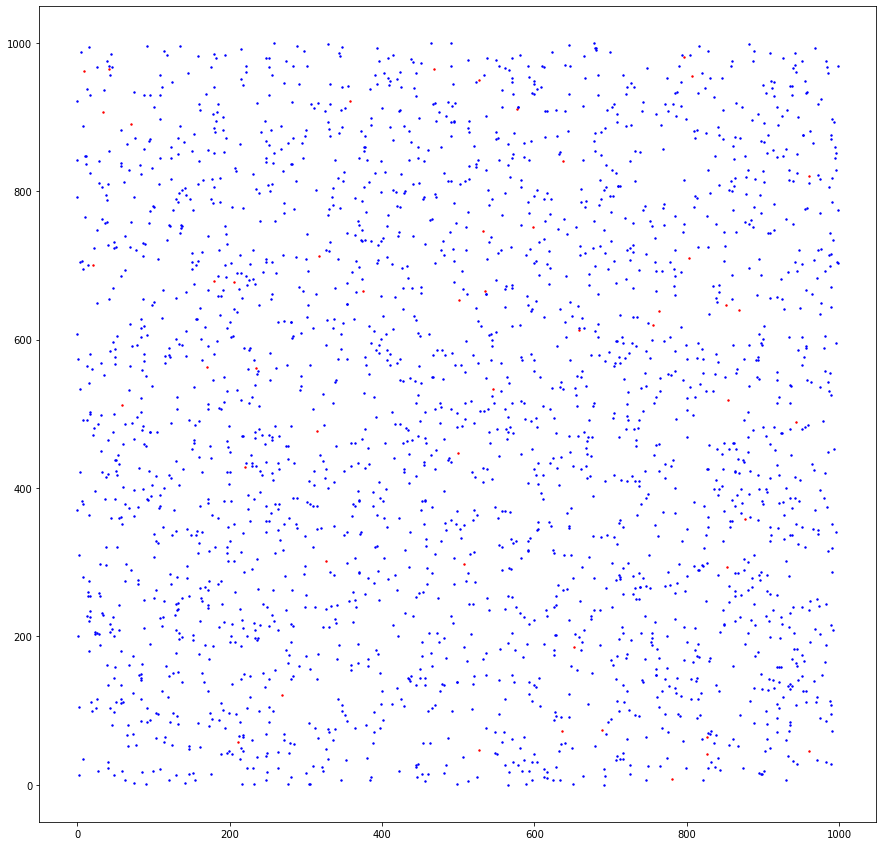

In [ ]:
almacenes = pd.read_csv("almacenes.csv", header=None).to_numpy()
puntos = pd.read_csv("puntos.csv", header=None).to_numpy()
plt.figure(figsize=(15, 15))
plt.scatter(almacenes[:, 0], almacenes[:, 1], 2, c="red")
plt.scatter(puntos[:, 0], puntos[:, 1], 2, c="blue")
plt.show() 

## Creación de secciones

In [ ]:
def dist(a, b):
  xa, ya = a
  xb, yb = b
  return abs(xa - xb) + abs(ya - yb)

In [ ]:
groups = [0]*len(puntos)

for i, a in enumerate(puntos):
  group = 0
  mindist = dist(a, almacenes[0])
  for j, b in enumerate(almacenes):
    d = dist(a, b)
    if d < mindist:
      mindist = d
      group = j
  groups[i] = group

In [ ]:
counts = [0]*len(almacenes)

for g in groups:
  counts[g] += 1

print(groups[:20])

[4, 1, 1, 2, 2, 12, 4, 9, 9, 4, 4, 4, 1, 0, 4, 1, 9, 4, 4, 1]


In [ ]:
puntos2 = np.c_[puntos, groups]
print(puntos2[:10])

[[  0. 370.   4.]
 [  0. 608.   1.]
 [  0. 792.   1.]
 [  0. 842.   2.]
 [  0. 921.   2.]
 [  1. 200.  12.]
 [  1. 574.   4.]
 [  2.  13.   9.]
 [  2. 105.   9.]
 [  2. 310.   4.]]


In [ ]:
dfpuntos = pd.DataFrame(puntos2)
dfpuntos.head()

,0,1,2
0,0.0,370.0,4.0
1,0.0,608.0,1.0
2,0.0,792.0,1.0
3,0.0,842.0,2.0
4,0.0,921.0,2.0


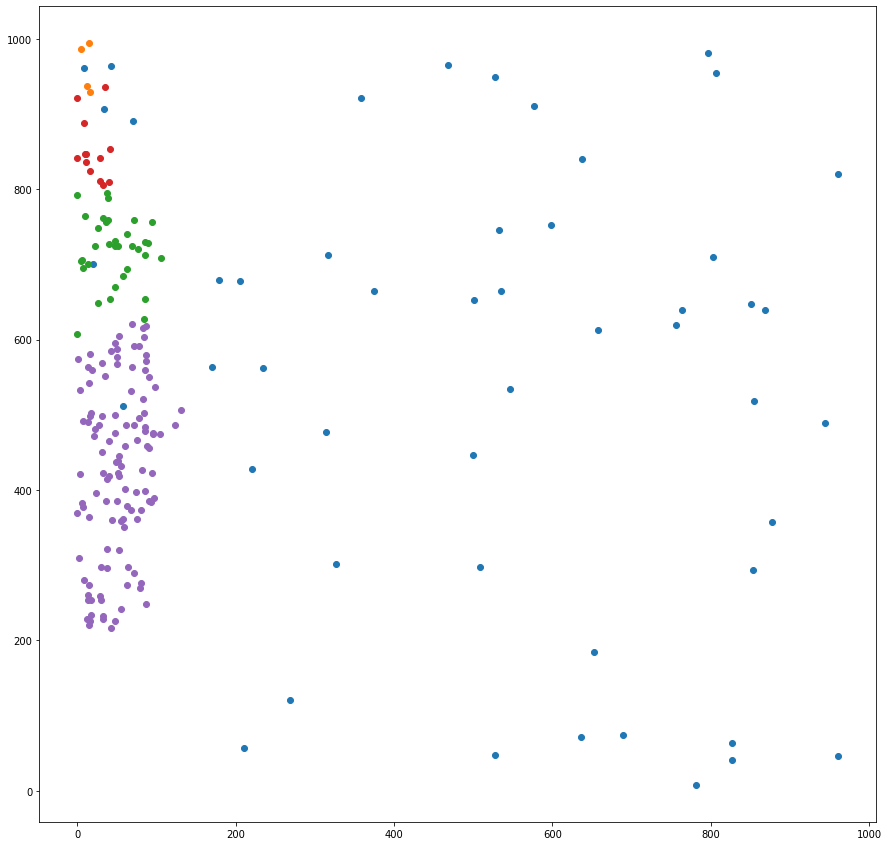

In [ ]:
plt.subplots(figsize=(15, 15))

show = [0, 1, 2, 4]

plt.scatter(almacenes[:, 0], almacenes[:, 1])
for alm in show:
  dftemp = dfpuntos[dfpuntos[2] == alm]
  plt.scatter(dftemp[0], dftemp[1])

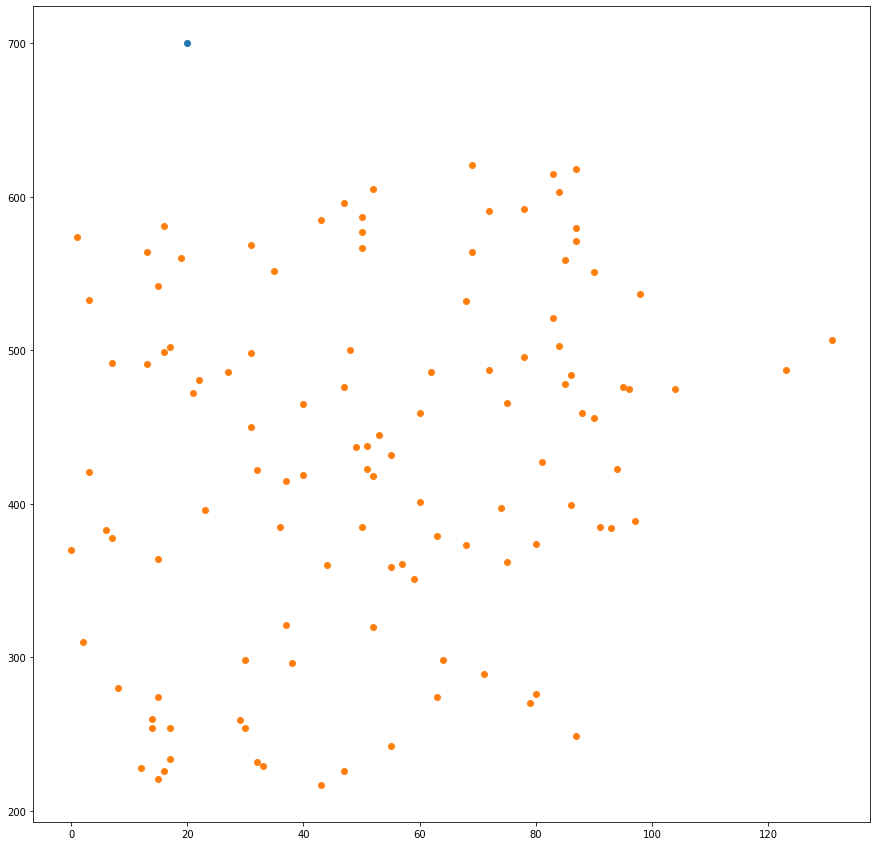

In [ ]:
plt.subplots(figsize=(15, 15))

plt.scatter(almacenes[1, 0], almacenes[1, 1])

dftemp = dfpuntos[dfpuntos[2] == 4]
plt.scatter(dftemp[0], dftemp[1])

In [ ]:
def escribirArchivo(cabezera, datos, archivo):
  with open(archivo, 'w') as a:
    write = csv.writer(a)
    if cabezera != None: write.writerow(cabezera)
    write.writerows(datos)

In [ ]:
ciudad = list()
ciudad.extend(puntos2)
ciudad.sort(key = lambda x: (x[0], x[1])) #Ordenar de mayor a menor los puntos
escribirArchivo(None, ciudad, 'ciudad.csv') 

## Creación del grafo de la ciudad

In [ ]:
import math
import graphviz as gv
import pandas as pd

In [ ]:
ciudad = pd.read_csv("ciudad.csv", header=None).to_numpy()

In [ ]:
print(ciudad[:40])

[[  0. 370.   4.]
 [  0. 608.   1.]
 [  0. 792.   1.]
 [  0. 842.   2.]
 [  0. 921.   2.]
 [  1. 200.  12.]
 [  1. 574.   4.]
 [  2.  13.   9.]
 [  2. 105.   9.]
 [  2. 310.   4.]
 [  3. 421.   4.]
 [  3. 533.   4.]
 [  4. 704.   1.]
 [  5. 987.   0.]
 [  6. 383.   4.]
 [  6. 706.   1.]
 [  7.  35.   9.]
 [  7. 378.   4.]
 [  7. 492.   4.]
 [  7. 695.   1.]
 [  8. 280.   4.]
 [  8. 888.   2.]
 [ 10. 765.   1.]
 [ 10. 847.   2.]
 [ 11. 836.   2.]
 [ 11. 847.   2.]
 [ 12. 228.   4.]
 [ 12. 938.   0.]
 [ 13. 491.   4.]
 [ 13. 564.   4.]
 [ 14. 254.   4.]
 [ 14. 260.   4.]
 [ 14. 701.   1.]
 [ 15. 180.  12.]
 [ 15. 221.   4.]
 [ 15. 274.   4.]
 [ 15. 364.   4.]
 [ 15. 542.   4.]
 [ 15. 994.   0.]
 [ 16. 226.   4.]]


In [ ]:
grafoCiudad=[[] for _ in range(len(ciudad))]

In [ ]:
for i,_ in enumerate(ciudad):
    grafoCiudad[int(ciudad[i][0])].append(int(ciudad[i][1]))

## Implementación de algoritmos

### Función para graficar grafos

In [ ]:
def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "5"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      g.edge(str(u), str(v), dir="forward", penwidth="2", color="blue")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(1))
        elif directed:
          g.edge(str(u), str(v), str(1))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

### Algoritmo Bellman Ford

In [ ]:
def bellmanFord(G, s):
  n = len(G)
  for node in range(n):
    cost[node] = float('inf')
    parent[node] = None
  
  cost[s] = 0
  
  # relax
  for _ in range(n-1):
    for current in range(n):
      for v in G[current]:
        if cost[current] + 1 < cost[v]:
          cost[v] = cost[current] + 1
          parent[v] = current
      

  # check negative cycle
  for current in range(n):
    for v in G[current]:
      if cost[current] + 1 < cost[v]:
        return None, None

  return parent, cost

In [ ]:
parent, cost = bellmanFord(grafoCiudad, 0)

NameError: ignored

In [ ]:
print(parent)
print(cost)

[None, 90, None, 141, None, 513, 384, 346, None, 616, 281, 446, 664, 48, 725, 147, 481, 617, 593, 901, 844, 109, 828, 799, 445, 749, 445, 725, 989, None, 983, None, 939, 707, 353, 712, 380, 236, None, 708, None, None, 203, 197, 264, 199, None, None, 326, 909, 649, 161, 147, 855, 77, 284, 836, None, 558, 795, 336, 906, 571, 486, None, 115, 212, 65, 694, None, 828, 776, None, None, None, 338, 536, 312, None, 173, 45, 379, 132, 159, 251, 213, 83, 626, 701, 177, 813, 646, 131, 791, 351, 772, 106, 199, 48, 711, 904, 724, 518, 223, 921, 764, 608, 469, 943, 399, 189, 60, 956, 883, None, 83, None, None, 119, 792, None, None, 593, 786, None, None, 721, 842, None, None, 785, 914, 602, 938, 444, 599, 203, None, 166, 921, 812, 83, 315, 908, 434, None, 521, 438, 978, 897, 163, 244, 132, None, 260, 359, 760, 774, 918, 921, 382, 68, 359, 85, 943, None, 808, 829, 797, 173, 382, 720, 585, 813, 708, 626, 160, 464, None, 893, 15, 626, 661, 941, None, None, 507, 215, 983, 95, 815, 566, 753, 475, None, 236

In [ ]:
adjlShow(grafoCiudad, path=cost)